## Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

### Import Libraries

In [96]:
# Import pandas libraries, numpy and matplot lib 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [97]:
# Capture the HTML baseball data and payroll from the baseball cube website
url_BB = "http://www.thebaseballcube.com/topics/payrolls/"
list_of_df_BB = pd.read_html(url_BB, header=0)
df_BB = list_of_df_BB[0] 
# Remove column headers 9-49 as the information is NaN
BB_columns = df_BB.dropna(axis=1)
df_BB_columns = pd.DataFrame(BB_columns)
# Change "Highest Payroll" and "Lowest Payroll" to "Highest Team Payroll" and "Lowest Team Payroll"
df_BB_columns = df_BB_columns.rename(columns={'Highest Payroll':'Highest Team Payroll', 'Lowest Payroll': 'Lowest Team Payroll'})
# Remove rows 20 and 33 as they do not contain data
df_BB_columns = df_BB_columns.drop(df_BB_columns.index[[20,33]])
df_BB_columns.head()
# Split column data: Highest Payroll, Lowest Payroll and Top Salary
df_BB_columns[['Highest Team Name','Highest Team Payroll']] = df_BB_columns['Highest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Lowest Team Name','Lowest Team Payroll']] = df_BB_columns['Lowest Team Payroll'].str.split("$",expand=True,)
df_BB_columns[['Top Salary Player Name','Top Player Salary']] = df_BB_columns['Top Salary'].str.split("$",expand=True,)
# Clean up column data: remove open and closed parantheses on split columns
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Highest Team Payroll'] = df_BB_columns['Highest Team Payroll'].astype(int)
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].str.replace(r"[),]",'')
df_BB_columns['Lowest Team Payroll'] = df_BB_columns['Lowest Team Payroll'].astype(int)
df_BB_columns['Highest Team Name'] = df_BB_columns['Highest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Lowest Team Name'] = df_BB_columns['Lowest Team Name'].str.replace(r"[(]",'')
df_BB_columns['Top Salary Player Name'] = df_BB_columns['Top Salary Player Name'].str.replace(r"[(]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].str.replace(r"[),]",'')
df_BB_columns['Top Player Salary'] = df_BB_columns['Top Player Salary'].astype(int)

df_BB_columns.head(10)

,Year,Total Payroll,League Min,Avg Salary,Player Count,Team Count,Top Salary,Highest Team Payroll,Lowest Team Payroll,Highest Team Name,Lowest Team Name,Top Salary Player Name,Top Player Salary
0,2019,"$ 4,007,869,480","$ 555,000","$ 4,509,524",1452,30,"Max Scherzer ($42,142,857)",222171123,60444931,Boston Red Sox,Tampa Bay Rays,Max Scherzer,42142857
1,2018,"$ 4,141,041,635","$ 545,000","$ 4,095,686",1384,30,"Mike Trout ($33,250,000)",235649368,68534631,Boston Red Sox,Oakland Athletics,Mike Trout,33250000
2,2017,"$ 3,878,284,045","$ 535,000","$ 4,097,122",1363,30,"Clayton Kershaw ($33,000,000)",187989811,34574400,Los Angeles Dodgers,San Diego Padres,Clayton Kershaw,33000000
3,2016,"$ 3,937,842,897","$ 507,500","$ 3,966,020",1358,30,"Clayton Kershaw ($32,000,000)",253639162,62964319,Los Angeles Dodgers,Milwaukee Brewers,Clayton Kershaw,32000000
4,2015,"$ 3,658,284,542","$ 507,500","$ 3,952,252",1358,30,"Clayton Kershaw ($31,000,000)",230352402,65770333,Los Angeles Dodgers,Arizona Diamondbacks,Clayton Kershaw,31000000
5,2014,"$ 3,453,960,397","$ 500,000","$ 3,818,923",1324,30,"Zack Greinke ($28,000,000)",235295219,44544174,Los Angeles Dodgers,Houston Astros,Zack Greinke,28000000
6,2013,"$ 3,187,568,088","$ 490,000","$ 3,386,212",1313,30,"Alex Rodriguez ($29,000,000)",228995945,24328538,New York Yankees,Houston Astros,Alex Rodriguez,29000000
7,2012,"$ 2,940,657,192","$ 480,000","$ 3,213,479",1291,30,"Alex Rodriguez ($30,000,000)",197962289,55244700,New York Yankees,San Diego Padres,Alex Rodriguez,30000000
8,2011,"$ 2,786,161,291","$ 414,000","$ 3,095,183",1306,30,"Alex Rodriguez ($32,000,000)",202689028,36126000,New York Yankees,Kansas City Royals,Alex Rodriguez,32000000
9,2010,"$ 2,730,601,685","$ 400,000","$ 3,014,572",1256,30,"Alex Rodriguez ($33,000,000)",206333389,34943000,New York Yankees,Pittsburgh Pirates,Alex Rodriguez,33000000


### Line 

<AxesSubplot:xlabel='Year'>

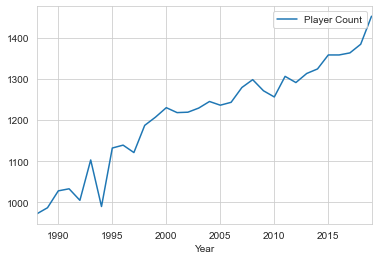

In [100]:
# Line Graph of Number of Players in the MLB from 1988-2020
df_BB_columns.Year = pd.to_datetime(df_BB_columns.Year, format='%Y') # format year column using to_datetime function
df_BB_columns["Player Count"] = df_BB_columns["Player Count"].astype(str).astype(int)
df_BB_columns.plot.line(x='Year', y='Player Count')

### Scatter

Text(0.5, 1.0, 'Lowest Team Payrolls Over Time')

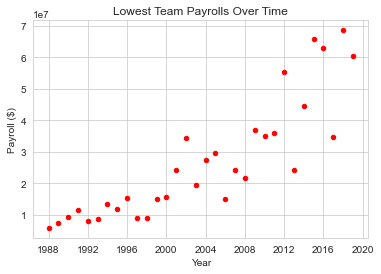

In [101]:
# Scatterplot of Lowest Team Payrolls from 1988-2020
df_BB_columns.plot(kind='scatter', x='Year', y='Lowest Team Payroll', alpha=1, color='red')
plt.xlabel('Year')
plt.ylabel('Payroll ($)')
plt.title('Lowest Team Payrolls Over Time')

### Bar

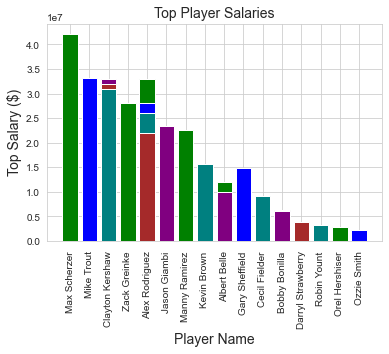

In [103]:
# Bar Chart of Top Player Salaries from 1988-2020
New_Colors = ['green','blue','purple','brown','teal']
plt.bar(df_BB_columns['Top Salary Player Name'], df_BB_columns['Top Player Salary'], color=New_Colors)
plt.title('Top Player Salaries', fontsize=14)
plt.xlabel('Player Name', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Top Salary ($)', fontsize=14)
plt.grid(True)
plt.show()

### Histogram

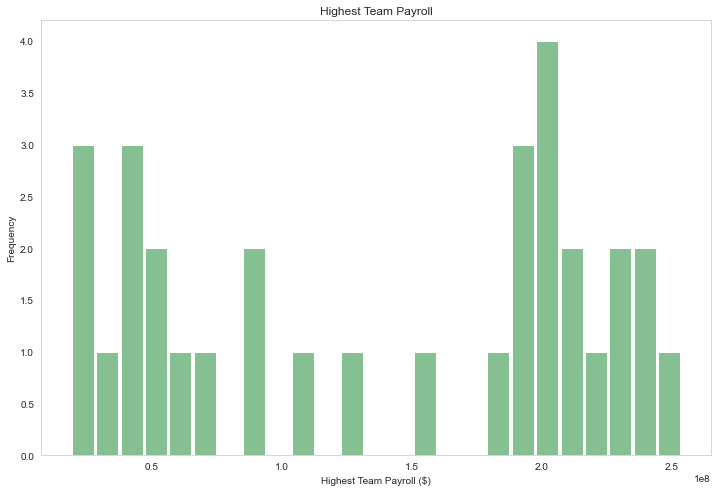

In [121]:
# Histogram of Highest Team Payroll Amounts from 1988-2020
hist = df_BB_columns.hist(column='Highest Team Payroll', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

for ax in hist.flatten():
    ax.set_xlabel("Highest Team Payroll ($)")
    ax.set_ylabel("Frequency")

### Pie Chart

<AxesSubplot:title={'center':'Aggregate Highest Team Payroll by Teams from 1988-2020'}, ylabel='Highest Team Payroll'>

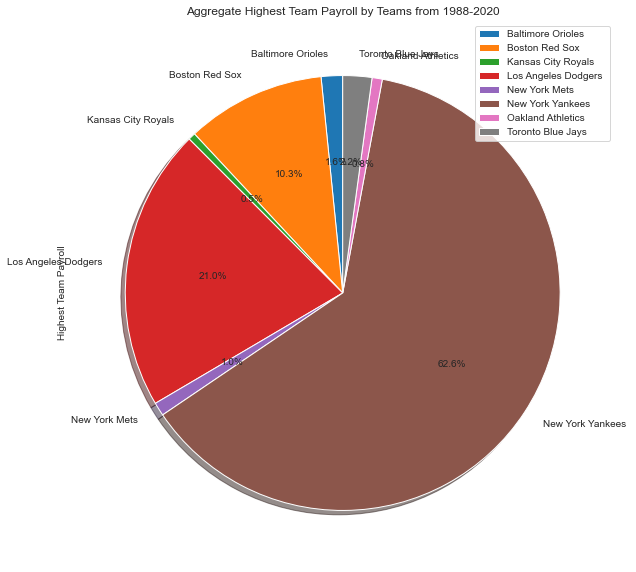

In [117]:
# Pie Chart to show the the breakdown of the MLB teams' highest payroll from 1988-2020
df_BB_columns.groupby(['Highest Team Name']).sum().plot(kind='pie', y='Highest Team Payroll', title='Aggregate Highest Team Payroll by Teams from 1988-2020', shadow = True,startangle=90,figsize=(15,10), autopct='%1.1f%%')

### Density Plot